# Choose Dataset

In [1]:
using Revise,NeuroAnalysis,Interact
droot = "../VLABDataExport";rroot = "../Result";iroot = "../NaturalStimuli";test = "LaserImage"
sdir = dropdown(filter!(x->x[1]!='.',readdir(droot)),label="Subject")
fname = map(x->dropdown(getvlabfile(subject=x,test=test,dir="$droot/$x"),label="Experiment"),signal(sdir))
display.([sdir,fname]);

INFO: Loading HttpServer methods...


Interact.Options{:Dropdown,String}(1: "input" = C1701 String , "Subject", "C1701", "C1701", 1, Interact.OptionDict(DataStructures.OrderedDict("C1701"=>"C1701","C1702"=>"C1702","C1801"=>"C1801","LSR1801"=>"LSR1801","LZR1602"=>"LZR1602","LZR1603"=>"LZR1603","LZR1604"=>"LZR1604","metadata.mat"=>"metadata.mat"), Dict("LZR1602"=>"LZR1602","metadata.mat"=>"metadata.mat","C1702"=>"C1702","LZR1604"=>"LZR1604","C1701"=>"C1701","C1801"=>"C1801","LZR1603"=>"LZR1603","LSR1801"=>"LSR1801")), Any[], Any[], true, "horizontal", true)

Interact.Options{:Dropdown,String}(3: "input-2" = C1701_V2Site2_3000Ch21_LaserImage_1.mat String , "Experiment", "C1701_V2Site2_3000Ch21_LaserImage_1.mat", "C1701_V2Site2_3000Ch21_LaserImage_1.mat", 1, Interact.OptionDict(DataStructures.OrderedDict("C1701_V2Site2_3000Ch21_LaserImage_1.mat"=>"C1701_V2Site2_3000Ch21_LaserImage_1.mat","C1701_V2Site2_3000Ch22_LaserImage_1.mat"=>"C1701_V2Site2_3000Ch22_LaserImage_1.mat","C1701_V2Site2_3549Ch22_LaserImage_1.mat"=>"C1701_V2Site2_3549Ch22_LaserImage_1.mat"), Dict("C1701_V2Site2_3000Ch22_LaserImage_1.mat"=>"C1701_V2Site2_3000Ch22_LaserImage_1.mat","C1701_V2Site2_3549Ch22_LaserImage_1.mat"=>"C1701_V2Site2_3549Ch22_LaserImage_1.mat","C1701_V2Site2_3000Ch21_LaserImage_1.mat"=>"C1701_V2Site2_3000Ch21_LaserImage_1.mat")), Any[], Any[], true, "horizontal", true)

 where K) in module PlotlyJS at C:\Users\fff00\.julia\v0.6\PlotlyJS\src\displays/electron.jl:51 overwritten at C:\Users\fff00\.julia\v0.6\PlotlyJS\src\displays/juno.jl:21.


# Prepare Dataset

In [2]:
dataset = prepare("$droot/$(sdir.value)/$(fname.value.value)","spike")

Dict{Any,Any} with 6 entries:
  "spike"         => Dict{String,Any}(Pair{String,Any}("unitid", Any[UInt8[0x01…
  "source"        => "X:\\C1801\\V2Site4bCh6_V1Site3a\\C1801_V2Site4bCh6_V1Site…
  "ex"            => Dict{String,Any}(Pair{String,Any}("Subject_ID", "C1801"),P…
  "secondperunit" => 0.001
  "filepath"      => "Y:\\C1801\\C1801_V2Site4bCh6_V1Site3a_LaserImage_1.mat"
  "sourceformat"  => "Ripple"

## Condition Test

In [3]:
using Plots,Colors,Images
ex = dataset["ex"];envparam = ex["EnvParam"];preicidur = ex["PreICI"];conddur = ex["CondDur"];suficidur = ex["SufICI"]
bgcolor=RGBA(getparam(envparam,"BGColor")...)
imagesetname = replace(getparam(envparam,"ImageSet","ImageQuad"),"Ã—","_")
imagemasktype = getparam(envparam,"MaskType","ImageQuad")
imagemaskradius = getparam(envparam,"MaskRadius","ImageQuad")
imagemasksigma = getparam(envparam,"Sigma","ImageQuad")
ct,ctc = ctctc(ex)
fl,fli,fln = flin(ctc,isindex=false)
cond=condin(ctc)
condon = float(ct[:CondOn]);condoff = float(ct[:CondOff]);mconddur=mean(condoff-condon)
plotlyjs();default(size=(650,420), leg=true)
histogram(condoff-condon,bins=20,title="Condition Duration(Set to $conddur ms)")

## Image Set

3×8 Array{Array{ColorTypes.GrayA{FixedPointNumbers.Normed{UInt8,8}},2},2}:
 ColorTypes.GrayA{FixedPointNumbers.Normed{UInt8,8}}[GrayA{N0f8}(0.898,1.0) GrayA{N0f8}(0.933,1.0) … GrayA{N0f8}(0.416,1.0) GrayA{N0f8}(0.427,1.0); GrayA{N0f8}(0.8,1.0) GrayA{N0f8}(0.769,1.0) … GrayA{N0f8}(0.537,1.0) GrayA{N0f8}(0.424,1.0); … ; GrayA{N0f8}(0.855,1.0) GrayA{N0f8}(0.839,1.0) … GrayA{N0f8}(0.192,1.0) GrayA{N0f8}(0.188,1.0); GrayA{N0f8}(0.851,1.0) GrayA{N0f8}(0.827,1.0) … GrayA{N0f8}(0.051,1.0) GrayA{N0f8}(0.129,1.0)]  …  ColorTypes.GrayA{FixedPointNumbers.Normed{UInt8,8}}[GrayA{N0f8}(0.765,1.0) GrayA{N0f8}(0.396,1.0) … GrayA{N0f8}(0.388,1.0) GrayA{N0f8}(0.573,1.0); GrayA{N0f8}(0.859,1.0) GrayA{N0f8}(0.875,1.0) … GrayA{N0f8}(0.42,1.0) GrayA{N0f8}(0.584,1.0); … ; GrayA{N0f8}(0.173,1.0) GrayA{N0f8}(0.173,1.0) … GrayA{N0f8}(0.255,1.0) GrayA{N0f8}(0.243,1.0); GrayA{N0f8}(0.192,1.0) GrayA{N0f8}(0.18,1.0) … GrayA{N0f8}(0.196,1.0) GrayA{N0f8}(0.239,1.0)]  
 ColorTypes.GrayA{FixedPointNumbers.Normed{UInt8,8}}[GrayA{N0f8}(0.153,1.0) GrayA{N0f8}(0.176,1.0) … GrayA{N0f8}(0.855,1.0) GrayA{N0f8}(0.933,1.0); GrayA{N0f8}(0.584,1.0) GrayA{N0f8}(0.686,1.0) … GrayA{N0f8}(0.624,1.0) GrayA{N0f8}(0.882,1.0); … ; GrayA{N0f8}(0.545,1.0) GrayA{N0f8}(0.486,1.0) … GrayA{N0f8}(0.0,1.0) GrayA{N0f8}(0.024,1.0); GrayA{N0f8}(0.537,1.0) GrayA{N0f8}(0.431,1.0) … GrayA{N0f8}(0.38,1.0) GrayA{N0f8}(0.486,1.0)]      ColorTypes.GrayA{FixedPointNumbers.Normed{UInt8,8}}[GrayA{N0f8}(0.0,1.0) GrayA{N0f8}(0.0,1.0) … GrayA{N0f8}(0.62,1.0) GrayA{N0f8}(0.431,1.0); GrayA{N0f8}(0.0,1.0) GrayA{N0f8}(0.0,1.0) … GrayA{N0f8}(0.427,1.0) GrayA{N0f8}(0.416,1.0); … ; GrayA{N0f8}(0.247,1.0) GrayA{N0f8}(0.239,1.0) … GrayA{N0f8}(1.0,1.0) GrayA{N0f8}(1.0,1.0); GrayA{N0f8}(0.247,1.0) GrayA{N0f8}(0.239,1.0) … GrayA{N0f8}(1.0,1.0) GrayA{N0f8}(1.0,1.0)]                 
 ColorTypes.GrayA{FixedPointNumbers.Normed{UInt8,8}}[GrayA{N0f8}(0.149,1.0) GrayA{N0f8}(0.157,1.0) … GrayA{N0f8}(0.243,1.0) GrayA{N0f8}(0.204,1.0); GrayA{N0f8}(0.106,1.0) GrayA{N0f8}(0.114,1.0) … GrayA{N0f8}(0.294,1.0) GrayA{N0f8}(0.235,1.0); … ; GrayA{N0f8}(0.024,1.0) GrayA{N0f8}(0.0,1.0) … GrayA{N0f8}(0.439,1.0) GrayA{N0f8}(0.443,1.0); GrayA{N0f8}(0.082,1.0) GrayA{N0f8}(0.031,1.0) … GrayA{N0f8}(0.396,1.0) GrayA{N0f8}(0.408,1.0)]     ColorTypes.GrayA{FixedPointNumbers.Normed{UInt8,8}}[GrayA{N0f8}(0.267,1.0) GrayA{N0f8}(0.196,1.0) … GrayA{N0f8}(0.071,1.0) GrayA{N0f8}(0.114,1.0); GrayA{N0f8}(0.255,1.0) GrayA{N0f8}(0.231,1.0) … GrayA{N0f8}(0.145,1.0) GrayA{N0f8}(0.153,1.0); … ; GrayA{N0f8}(0.949,1.0) GrayA{N0f8}(0.914,1.0) … GrayA{N0f8}(0.663,1.0) GrayA{N0f8}(0.784,1.0); GrayA{N0f8}(0.965,1.0) GrayA{N0f8}(0.945,1.0) … GrayA{N0f8}(0.686,1.0) GrayA{N0f8}(0.776,1.0)]
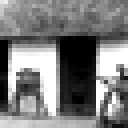
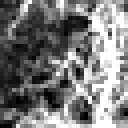
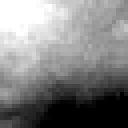
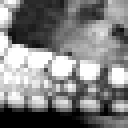
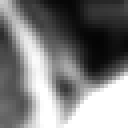
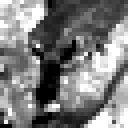
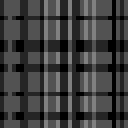
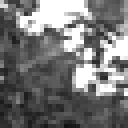
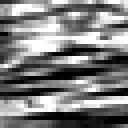
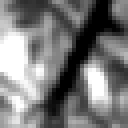
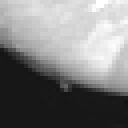
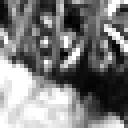
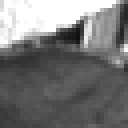
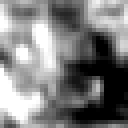
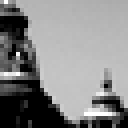
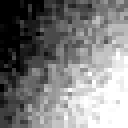
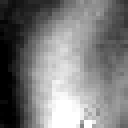
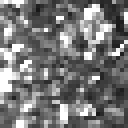
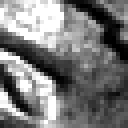
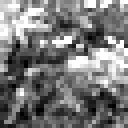
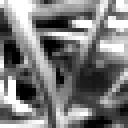
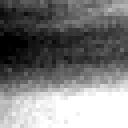
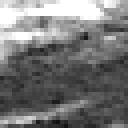
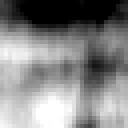

In [4]:
imageset = loadimageset("$iroot/$imagesetname",name=fl[:Image],alpha=true)
bgimagecolor = oftype(imageset[1][1],bgcolor)
display(rand(imageset,3,8))

## Prepare Image Stimuli

In [5]:
nscale = 2;downsample = 2;sigma = 1.5
imagestimuli = map(i->gaussian_pyramid(i, nscale-1, downsample, sigma),imageset)
imagesize = map(i->size(i),imagestimuli[1])
unmaskindex = map(i->alphamask(i,radius=imagemaskradius,sigma=imagemasksigma,masktype=imagemasktype)[2],imagestimuli[1])
imagestimuli = map(s->map(i->alphablend.(alphamask(i[s],radius=imagemaskradius,sigma=imagemasksigma,masktype=imagemasktype)[1],[bgimagecolor]),imagestimuli),1:nscale);

In [6]:
scaleindex = slider(1:nscale,value=2,label="Scale")

Interact.Slider{Int64}(9: "input-4" = 2 Int64 , "Scale", 2, 1:2, "horizontal", true, "d", true)

3×8 Array{Array{ColorTypes.GrayA{Float64},2},2}:
 ColorTypes.GrayA{Float64}[GrayA{Float64}(0.629497,1.0) GrayA{Float64}(0.339501,1.0) … GrayA{Float64}(0.0254947,1.0) GrayA{Float64}(0.0427574,1.0); GrayA{Float64}(0.355092,1.0) GrayA{Float64}(0.29237,1.0) … GrayA{Float64}(0.0313916,1.0) GrayA{Float64}(0.0399261,1.0); … ; GrayA{Float64}(0.614682,1.0) GrayA{Float64}(0.62024,1.0) … GrayA{Float64}(0.682154,1.0) GrayA{Float64}(0.71151,1.0); GrayA{Float64}(0.616414,1.0) GrayA{Float64}(0.623755,1.0) … GrayA{Float64}(0.662136,1.0) GrayA{Float64}(0.680728,1.0)]   …  ColorTypes.GrayA{Float64}[GrayA{Float64}(0.654311,1.0) GrayA{Float64}(0.823652,1.0) … GrayA{Float64}(0.610001,1.0) GrayA{Float64}(0.778504,1.0); GrayA{Float64}(0.668013,1.0) GrayA{Float64}(0.845674,1.0) … GrayA{Float64}(0.643658,1.0) GrayA{Float64}(0.748075,1.0); … ; GrayA{Float64}(0.511248,1.0) GrayA{Float64}(0.277402,1.0) … GrayA{Float64}(0.464442,1.0) GrayA{Float64}(0.267035,1.0); GrayA{Float64}(0.524965,1.0) GrayA{Float64}(0.281931,1.0) … GrayA{Float64}(0.39364,1.0) GrayA{Float64}(0.195011,1.0)] 
 ColorTypes.GrayA{Float64}[GrayA{Float64}(0.0566449,1.0) GrayA{Float64}(0.0373972,1.0) … GrayA{Float64}(0.521358,1.0) GrayA{Float64}(0.628849,1.0); GrayA{Float64}(0.294341,1.0) GrayA{Float64}(0.218228,1.0) … GrayA{Float64}(0.363982,1.0) GrayA{Float64}(0.474953,1.0); … ; GrayA{Float64}(0.697041,1.0) GrayA{Float64}(0.715086,1.0) … GrayA{Float64}(0.673645,1.0) GrayA{Float64}(0.839734,1.0); GrayA{Float64}(0.842571,1.0) GrayA{Float64}(0.822183,1.0) … GrayA{Float64}(0.654147,1.0) GrayA{Float64}(0.779739,1.0)]     ColorTypes.GrayA{Float64}[GrayA{Float64}(0.70719,1.0) GrayA{Float64}(0.817271,1.0) … GrayA{Float64}(0.680312,1.0) GrayA{Float64}(0.775681,1.0); GrayA{Float64}(0.676855,1.0) GrayA{Float64}(0.728753,1.0) … GrayA{Float64}(0.653964,1.0) GrayA{Float64}(0.796016,1.0); … ; GrayA{Float64}(0.503092,1.0) GrayA{Float64}(0.382725,1.0) … GrayA{Float64}(0.374109,1.0) GrayA{Float64}(0.377076,1.0); GrayA{Float64}(0.388796,1.0) GrayA{Float64}(0.271473,1.0) … GrayA{Float64}(0.261056,1.0) GrayA{Float64}(0.276766,1.0)] 
 ColorTypes.GrayA{Float64}[GrayA{Float64}(0.223184,1.0) GrayA{Float64}(0.234263,1.0) … GrayA{Float64}(0.609599,1.0) GrayA{Float64}(0.462587,1.0); GrayA{Float64}(0.20409,1.0) GrayA{Float64}(0.204122,1.0) … GrayA{Float64}(0.496812,1.0) GrayA{Float64}(0.386928,1.0); … ; GrayA{Float64}(0.738678,1.0) GrayA{Float64}(0.908523,1.0) … GrayA{Float64}(0.233749,1.0) GrayA{Float64}(0.252178,1.0); GrayA{Float64}(0.666318,1.0) GrayA{Float64}(0.883048,1.0) … GrayA{Float64}(0.297563,1.0) GrayA{Float64}(0.311105,1.0)]        ColorTypes.GrayA{Float64}[GrayA{Float64}(0.495572,1.0) GrayA{Float64}(0.49578,1.0) … GrayA{Float64}(0.0937278,1.0) GrayA{Float64}(0.202391,1.0); GrayA{Float64}(0.475331,1.0) GrayA{Float64}(0.468644,1.0) … GrayA{Float64}(0.105932,1.0) GrayA{Float64}(0.199361,1.0); … ; GrayA{Float64}(0.352588,1.0) GrayA{Float64}(0.441946,1.0) … GrayA{Float64}(0.199629,1.0) GrayA{Float64}(0.260297,1.0); GrayA{Float64}(0.402095,1.0) GrayA{Float64}(0.499006,1.0) … GrayA{Float64}(0.214927,1.0) GrayA{Float64}(0.210953,1.0)]
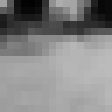
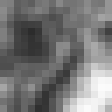
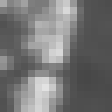
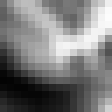
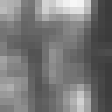
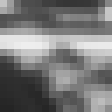
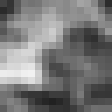
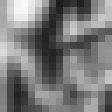
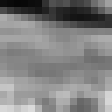
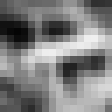
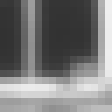
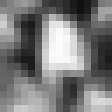
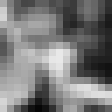
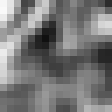
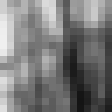
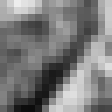
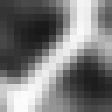
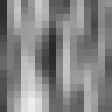
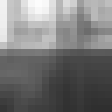
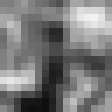
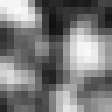
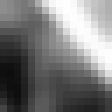
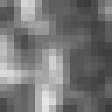
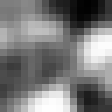

In [7]:
display(rand(imagestimuli[scaleindex.value],3,8))

In [8]:
pixelscale = 255
ximagesize = imagesize[scaleindex.value]
xi = unmaskindex[scaleindex.value]
imagestimulimatrix = Array{Float64}(length(imageset),prod(ximagesize))
for i in 1:size(imagestimulimatrix,1)
    imagestimulimatrix[i,:] = vec(gray.(imagestimuli[scaleindex.value][i]))
end

In [10]:
xx = imagestimulimatrix[map(i->findfirst(fl[:Image].==i),ctc[:Image]),:]*pixelscale;

# Spiking Activity

In [18]:
spike = dataset["spike"];spikeeid = spike["electrodeid"];spikeuuid = spike["uuid"];spikeuid = spike["unitid"];spiketime = spike["time"]
eid = togglebuttons(spikeeid,label="Electrode")
stext = slider(0:1000,value=30,label="Spike Extention")
display.([eid,stext]);

Interact.Options{:ToggleButtons,Any}(23: "input-11" = 1 Any , "Electrode", 0x0001, "1", 1, Interact.OptionDict(DataStructures.OrderedDict{String,Any}("1"=>0x0001,"2"=>0x0002,"3"=>0x0003,"4"=>0x0004,"5"=>0x0005,"6"=>0x0006,"7"=>0x0007,"8"=>0x0008,"9"=>0x0009,"10"=>0x000a…), Dict{Any,String}(Pair{Any,String}(0x0012, "18"),Pair{Any,String}(0x0002, "2"),Pair{Any,String}(0x0010, "16"),Pair{Any,String}(0x000b, "11"),Pair{Any,String}(0x0015, "21"),Pair{Any,String}(0x0007, "7"),Pair{Any,String}(0x0009, "9"),Pair{Any,String}(0x0019, "25"),Pair{Any,String}(0x000a, "10"),Pair{Any,String}(0x0013, "19")…)), Any[], Any[], true, "horizontal", true)

Interact.Slider{Int64}(25: "input-12" = 30 Int64 , "Spike Extention", 30, 0:1000, "horizontal", true, "d", true)

In [38]:
eididx = findfirst(spikeeid.==eid.value);est = spiketime[eididx];esu = spikeuid[eididx]
sts,ns,ws,is = subrv(est,condon-stext.value,condoff+stext.value,isminzero=true)
sts = map(x->x-stext.value,sts)
plotspiketrain(sts,uids=map(i->esu[i],is),timeline=[0,mconddur],title="Electrode$(eid.value)")

In [39]:
uid = map(e->togglebuttons(["All";spikeuuid[findfirst(spikeeid.==e)]],label="Unit"),signal(eid))
delay = slider(0:100,value=20,label="Delay")
display.([uid,delay]);

Interact.Options{:ToggleButtons,Any}(47: "input-21" = All Any , "Unit", "All", "All", 1, Interact.OptionDict(DataStructures.OrderedDict{String,Any}("All"=>"All","0"=>0x00,"1"=>0x01,"2"=>0x02), Dict{Any,String}(Pair{Any,String}(0x00, "0"),Pair{Any,String}(0x02, "2"),Pair{Any,String}("All", "All"),Pair{Any,String}(0x01, "1"))), Any[], Any[], true, "horizontal", true)

Interact.Slider{Int64}(50: "input-22" = 20 Int64 , "Delay", 20, 0:100, "horizontal", true, "d", true)

In [40]:
st = uid.value.value=="All"?est:est[esu.==uid.value.value]
yy = subrvr(st,condon+delay.value,condoff+delay.value);

# ePPR

In [ ]:
using ePPR
lcond = condin(ctc[:,filter(f->f!=:Image,names(ctc))]);

## Laser Condition

In [41]:
laser0index = lcond[1,:i]
x=xx[laser0index,:]
y=yy[laser0index];

Interact.Slider{Int64}(53: "input-23" = 12000 Int64 , "", 12000, 1:24000, "horizontal", true, "d", true)

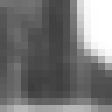

"y = 0.0"

In [42]:
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/pixelscale,ximagesize)),signal(i))
yvalue = map(j->"y = $(y[j])",signal(i))
display.([i,xvalue,yvalue]);

In [43]:
hp = ePPRHyperParams(ximagesize...,xindex=xi,ndelay=1,blankcolor=gray(bgimagecolor)*pixelscale)
hp.nft = [6]
hp.lambda = 30000
model,models = epprcv(x,y,hp,ePPRDebugOptions(level=DebugVisual));

Cross Validation Data Partition: n = 24000, ntrain = 21600 in 5-fold, ntrainfold = 4320 in 8-fold, ntest = 2400 in 8-fold
ePPR Forward Stepwise ...
Fit [Temporal-0, Spatial-1] New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 93212.691672869, PenaltyLoss: 203005.76098299515.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.000098193660417
                                 step is λ = 0
New Term 2th iteration. TermLoss: 93321.81232969153, PenaltyLoss: 21.16383720338778.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.010777547810065
                                 step is λ = 0
New Term 3th iteration. TermLoss: 93316.50281290899, PenaltyLoss: 19.59287648216034.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1121104762682277
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 9.799043926259654e-6.
Fit [Temporal-0, Spatial-

NewtonTrustRegion 1th iteration, r = 0.015625
                                 ρ = 0.9557415100933631
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 3.6349141615849866e-5.
Refit [Temporal-0, Spatial-4] New Term ...
New Term 1th iteration. TermLoss: 92651.72834470331, PenaltyLoss: 19.86574507256887.
NewtonTrustRegion 1th iteration, r = 0.015625
                                 ρ = 0.5924317840708436
                                 step is easy
New Term 2th iteration. TermLoss: 92563.3186963609, PenaltyLoss: 47.30729508480072.
NewtonTrustRegion 1th iteration, r = 0.015625
                                 ρ = 0.1620374486399452
                                 step is λ = 0
NewtonTrustRegion 2th iteration, r = 0.00390625
                                 ρ = 0.7332955729818507
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00024356317391219576.
Refit [Temporal-0, Sp

Drop Term: [temporal-0, spatial-1] with β: 0.07302010634545142.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.0989417, 0.0927131, 0.137654, 0.094768, 0.0885415]
New βs: [0.119107, 0.102385, 0.204058, 0.107335, 0.142479]
Refit [Temporal-0, Spatial-2] New Term ...
New Term 1th iteration. TermLoss: 92457.0043438534, PenaltyLoss: 38.53231164808844.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.521978214950741
                                 step is λ = 0
New Term 2th iteration. TermLoss: 92461.10800515268, PenaltyLoss: 33.68258415262786.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.23620151008097887
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.056400975770195e-6.
Refit [Temporal-0, Spatial-3] New Term ...
New Term 1th iteration. TermLoss: 92456.86196500824, PenaltyLoss: 19.005482199388076.
NewtonTrustRegion 1th iteration, r = 0.015625
                

Drop Term: [temporal-0, spatial-5] with β: 0.0816987346027505.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.0958715, 0.0957028, 0.204058, 0.142479]
New βs: [0.125068, 0.10298, 0.20897, 0.149166]
Refit [Temporal-0, Spatial-2] New Term ...
New Term 1th iteration. TermLoss: 92550.23450879172, PenaltyLoss: 31.079050497795535.
NewtonTrustRegion 1th iteration, r = 0.25
                                 ρ = 0.275892817889403
                                 step is λ = 0
New Term 2th iteration. TermLoss: 92552.33674149562, PenaltyLoss: 28.0970663437318.
NewtonTrustRegion 1th iteration, r = 0.25
                                 ρ = 0.5619771384544019
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 8.43533388993081e-6.
Model Loss increased from 92671.9072918308 to 92678.52950727896. Discard the new term, keep the old one.
Refit [Temporal-0, Spatial-3] New Term ...
New Term 1th iteration. TermLoss: 92540.28597915458, PenaltyLoss: 

Drop Term: [temporal-0, spatial-3] with β: 0.10112566002886073.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.125068, 0.20897, 0.149166]
New βs: [0.12023, 0.204219, 0.138913]
Refit [Temporal-0, Spatial-2] New Term ...
New Term 1th iteration. TermLoss: 92640.21691282972, PenaltyLoss: 31.079050497795535.
NewtonTrustRegion 1th iteration, r = 0.25
                                 ρ = 0.24059830169447138
                                 step is λ = 0
New Term 2th iteration. TermLoss: 92642.99601316615, PenaltyLoss: 28.03033690423179.
NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = 0.49695500355657796
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 4.794716700297247e-6.
Model Loss increased from 92740.71411188135 to 92746.78710039519. Discard the new term, keep the old one.
Refit [Temporal-0, Spatial-4] New Term ...
New Term 1th iteration. TermLoss: 92648.28665061445, PenaltyLoss: 50.7600400316

Drop Term: [temporal-0, spatial-2] with β: 0.1202303930729264.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.204219, 0.138913]
New βs: [0.208121, 0.140511]
Refit [Temporal-0, Spatial-4] New Term ...
New Term 1th iteration. TermLoss: 92770.86806597903, PenaltyLoss: 50.7600400316996.
NewtonTrustRegion 1th iteration, r = 0.00390625
                                 ρ = 0.5518144926639422
                                 step is easy
New Term 2th iteration. TermLoss: 92764.9986227143, PenaltyLoss: 54.78125014163289.
NewtonTrustRegion 1th iteration, r = 0.00390625
                                 ρ = 0.862574834121358
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00010271364583279995.
Model Loss increased from 92834.34692219154 to 92850.09502719458. Discard the new term, keep the old one.
Refit [Temporal-0, Spatial-6] New Term ...
New Term 1th iteration. TermLoss: 92776.25084599936, PenaltyLoss: 25.24651376903014.
NewtonTru

Drop Term: [temporal-0, spatial-6] with β: 0.1405111138113049.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.208121]
New βs: [0.236158]
Refit [Temporal-0, Spatial-4] New Term ...
New Term 1th iteration. TermLoss: 92948.69056534172, PenaltyLoss: 50.7600400316996.
NewtonTrustRegion 1th iteration, r = 0.00390625
                                 ρ = 0.8035909341463815
                                 step is easy
New Term 2th iteration. TermLoss: 92938.60835988751, PenaltyLoss: 56.91721838486896.
NewtonTrustRegion 1th iteration, r = 0.0078125
                                 ρ = 1.031708951197676
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00021356252148063058.
Model Loss increased from 92972.88180287638 to 93013.06919269335. Discard the new term, keep the old one.


ePPR Cross Validation ...


1th model with 1 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model [Temporal-0, Spatial-1] New Term ...
Refit Model βs ...
Old βs: [0.171276]
New βs: [0.23947]
Cross Validated ePPR Done.


### Final Model

In [44]:
plotmodel(model,hp)

## Laser Condition

In [45]:
laser1index = lcond[end,:i]
x=xx[laser1index,:]
y=yy[laser1index];

Interact.Slider{Int64}(59: "input-24" = 12000 Int64 , "", 12000, 1:24000, "horizontal", true, "d", true)

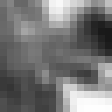

"y = 0.0"

In [46]:
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/pixelscale,ximagesize)),signal(i))
yvalue = map(j->"y = $(y[j])",signal(i))
display.([i,xvalue,yvalue]);

In [47]:
hp = ePPRHyperParams(ximagesize...,xindex=xi,ndelay=1,blankcolor=gray(bgimagecolor)*pixelscale)
hp.nft = [6]
hp.lambda = 30000
model,models = epprcv(x,y,hp,ePPRDebugOptions(level=DebugVisual));

Cross Validation Data Partition: n = 24000, ntrain = 21600 in 5-fold, ntrainfold = 4320 in 8-fold, ntest = 2400 in 8-fold
ePPR Forward Stepwise ...
Fit [Temporal-0, Spatial-1] New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 265722.93187255337, PenaltyLoss: 202613.2801344134.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0001606279584845
                                 step is λ = 0
New Term 2th iteration. TermLoss: 266250.060414232, PenaltyLoss: 13.737579775076947.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = -0.6555013618101915
                                 step is λ = 0
NewtonTrustRegion 2th iteration, r = 0.25
                                 ρ = -0.6555013618101915
                                 step is λ = 0
NewtonTrustRegion 3th iteration, r = 0.0625
                                 ρ = -0.4862118352200476
                                 step is easy
NewtonTrustRegion 4th iteration, r = 0.0

                                 step is easy
New Term 2th iteration. TermLoss: 264634.6937188022, PenaltyLoss: 16.914205688841253.
NewtonTrustRegion 1th iteration, r = 0.03125
                                 ρ = 1.0728084885854374
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00013879002192001332.
Refit [Temporal-0, Spatial-2] New Term ...
New Term 1th iteration. TermLoss: 264559.59107476496, PenaltyLoss: 34.566613688136854.
NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = 0.8136657542342991
                                 step is easy
New Term 2th iteration. TermLoss: 264442.2951818561, PenaltyLoss: 55.57498875575836.
NewtonTrustRegion 1th iteration, r = 0.125
                                 ρ = 0.7749878333809875
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 7.919420850566154e-5.
Refit [Temporal-0, Spatial-3] New Term ...
N

Drop Term: [temporal-0, spatial-2] with β: 0.14427609168043257.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.167986, 0.256666, 0.213503, 0.277989, 0.158645]
New βs: [0.208205, 0.383737, 0.288293, 0.405961, 0.217891]
Refit [Temporal-0, Spatial-1] New Term ...
New Term 1th iteration. TermLoss: 263300.4394252394, PenaltyLoss: 35.67321545317791.
NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = 1.1608307004655243
                                 step is λ = 0
New Term 2th iteration. TermLoss: 263244.02183170646, PenaltyLoss: 57.83859489933015.
NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = 0.8803530217646263
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 7.729142110562395e-5.
Refit [Temporal-0, Spatial-3] New Term ...
New Term 1th iteration. TermLoss: 263145.6110672177, PenaltyLoss: 201.26398433071805.
NewtonTrustRegion 1th iteration, r = 0.0078125
          

Drop Term: [temporal-0, spatial-1] with β: 0.19320193819794576.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.357792, 0.288293, 0.405961, 0.195547]
New βs: [0.441008, 0.217741, 0.430983, 0.216759]
Refit [Temporal-0, Spatial-3] New Term ...
New Term 1th iteration. TermLoss: 263197.9493811053, PenaltyLoss: 296.8408936334466.
NewtonTrustRegion 1th iteration, r = 0.03125
                                 ρ = 0.9049930217032874
                                 step is λ = 0
New Term 2th iteration. TermLoss: 263115.05937367456, PenaltyLoss: 361.5266778907362.
NewtonTrustRegion 1th iteration, r = 0.03125
                                 ρ = 0.767234366559194
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.399525361188634e-5.
Refit [Temporal-0, Spatial-4] New Term ...
New Term 1th iteration. TermLoss: 263142.804646027, PenaltyLoss: 20.774833226274776.
NewtonTrustRegion 1th iteration, r = 0.03125
                                

Drop Term: [temporal-0, spatial-6] with β: 0.17875908571540555.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.392344, 0.217741, 0.430983]
New βs: [0.491393, 0.263747, 0.379622]
Refit [Temporal-0, Spatial-3] New Term ...
New Term 1th iteration. TermLoss: 263497.8498342998, PenaltyLoss: 378.03667788731224.
NewtonTrustRegion 1th iteration, r = 0.03125
                                 ρ = 0.5823368069778347
                                 step is λ = 0
New Term 2th iteration. TermLoss: 263527.21113041154, PenaltyLoss: 369.18903585360346.
NewtonTrustRegion 1th iteration, r = 0.03125
                                 ρ = 0.18652442387153903
                                 step is λ = 0
NewtonTrustRegion 2th iteration, r = 0.0078125
                                 ρ = 0.18652442387153903
                                 step is λ = 0
NewtonTrustRegion 3th iteration, r = 0.001953125
                                 ρ = 0.5287839375901048
                                 step is easy
New

Drop Term: [temporal-0, spatial-4] with β: 0.26361809057011576.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.491393, 0.379622]
New βs: [0.387233, 0.373089]
Refit [Temporal-0, Spatial-3] New Term ...
New Term 1th iteration. TermLoss: 263794.6569800767, PenaltyLoss: 378.03667788731224.
NewtonTrustRegion 1th iteration, r = 0.03125
                                 ρ = 0.5894569149023079
                                 step is λ = 0
New Term 2th iteration. TermLoss: 263760.5348763783, PenaltyLoss: 414.2865159838522.
NewtonTrustRegion 1th iteration, r = 0.03125
                                 ρ = 0.1138723226926293
                                 step is λ = 0
NewtonTrustRegion 2th iteration, r = 0.0078125
                                 ρ = 0.1138723226926293
                                 step is λ = 0
NewtonTrustRegion 3th iteration, r = 0.001953125
                                 ρ = 0.7074050223666875
                                 step is easy
New Term converged in 2 ite

Drop Term: [temporal-0, spatial-3] with β: 0.3204038198187456.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.373089]
New βs: [0.358969]
Refit [Temporal-0, Spatial-5] New Term ...
New Term 1th iteration. TermLoss: 265195.88757922326, PenaltyLoss: 161.18644035336555.
NewtonTrustRegion 1th iteration, r = 0.00390625
                                 ρ = 0.8442583442968307
                                 step is easy
New Term 2th iteration. TermLoss: 265191.19223061344, PenaltyLoss: 172.41324905002017.
NewtonTrustRegion 1th iteration, r = 0.0078125
                                 ρ = 0.846103504618192
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00015276888878580297.
Model Loss increased from 265395.53784972476 to 265395.74416995223. Discard the new term, keep the old one.


ePPR Cross Validation ...


1th model with 1 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model [Temporal-0, Spatial-1] New Term ...
Refit Model βs ...
Old βs: [0.257455]
New βs: [0.387629]
Cross Validated ePPR Done.


### Final Model

In [48]:
plotmodel(model,hp)